고객 만족도 예측

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
pd.set_option('display.max_column', 30)
from numpy import nan as NA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Flight Distance'}>,
        <Axes: title={'center': 'Seat comfort'}>,
        <Axes: title={'center': 'Departure/Arrival time convenient'}>],
       [<Axes: title={'center': 'Food and drink'}>,
        <Axes: title={'center': 'Gate location'}>,
        <Axes: title={'center': 'Inflight wifi service'}>,
        <Axes: title={'center': 'Inflight entertainment'}>],
       [<Axes: title={'center': 'Online support'}>,
        <Axes: title={'center': 'Ease of Online booking'}>,
        <Axes: title={'center': 'On-board service'}>,
        <Axes: title={'center': 'Leg room service'}>],
       [<Axes: title={'center': 'Baggage handling'}>,
        <Axes: title={'center': 'Checkin service'}>,
        <Axes: title={'center': 'Cleanliness'}>,
        <Axes: title={'center': 'Online boarding'}>],
       [<Axes: title={'center': 'Departure Delay in Minutes'}>,
        <Axes: title={'center': 'Arrival Delay in Minutes'}>, <Axe

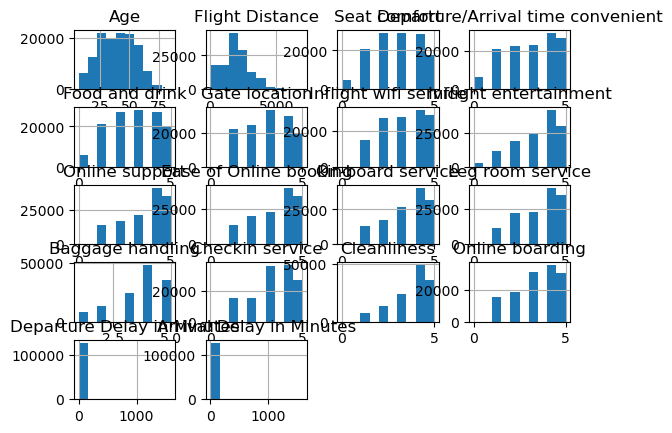

In [3]:
# =============================================================================
# 컬럼
# =============================================================================
# satisfaction(명목)                                                 [satisfied, dissatisfied]
# Gender(명목)                                                                  [Female, Male]
# Customer Type(명목)                                      [Loyal Customer, disloyal Customer]
# Age(연속)                                  [65, 47, 15, 60, 70, 30, 66, 10, 56, 22, 58, 3...
# Type of Travel(명목)                                      [Personal Travel, Business travel]
# Class(명목)                                                        [Eco, Business, Eco Plus]
# Flight Distance(연속)                     [265, 2464, 2138, 623, 354, 1894, 227, 1812, 7...
# Seat comfort(순위)                                                        [0, 1, 4, 5, 2, 3]
# Departure/Arrival time convenient(연속)                                   [0, 1, 2, 3, 4, 5]
# Food and drink(순위)                                                      [0, 1, 2, 3, 4, 5]
# Gate location(순위)                                                       [2, 3, 4, 1, 5, 0]
# Inflight wifi service(순위)                                               [2, 0, 3, 4, 5, 1]
# Inflight entertainment(순위)                                              [4, 2, 0, 3, 5, 1]
# Online support(순위)                                                      [2, 3, 4, 5, 1, 0]
# Ease of Online booking(순위)                                              [3, 2, 1, 5, 4, 0]
# On-board service(순위)                                                    [3, 4, 1, 2, 5, 0]
# Leg room service(순위)                                                    [0, 4, 3, 2, 5, 1]
# Baggage handling(순위)                                                       [3, 4, 1, 2, 5]
# Checkin service(순위)                                                     [5, 2, 4, 3, 1, 0]
# Cleanliness(순위)                                                         [3, 4, 1, 2, 5, 0]
# Online boarding(순위)                                                     [2, 3, 5, 4, 1, 0]
# Departure Delay in Minutes(연속)           [0, 310, 17, 30, 47, 40, 5, 2, 34, 4, 13, 427,...
# Arrival Delay in Minutes(연속)             [0.0, 305.0, 15.0, 26.0, 48.0, 23.0, 19.0, 2.0...


# 데이터 로딩
airline = pd.read_csv('Invistico_Airline.csv')

airline.info()
airline.isnull().sum()
airline.describe()
airline.hist()


In [4]:
# =============================================================================
# 라벨인코딩
# =============================================================================
satisfaction_mapping = {"satisfied": 1, "dissatisfied": 0}
airline['satisfaction'] = airline['satisfaction'].map(satisfaction_mapping) 
  
gender_mapping = {"Female": 1, "Male": 0}
airline['Gender'] = airline['Gender'].map(gender_mapping) 
 
customer_type_mapping = {"Loyal Customer": 1, "disloyal Customer": 0}
airline['Customer Type'] = airline['Customer Type'].map(customer_type_mapping) 
  
travel_type_mapping = {"Business travel": 2, "Personal Travel": 1}
airline['Type of Travel'] = airline['Type of Travel'].map(travel_type_mapping)  

class_mapping = {"Business": 3, "Eco Plus": 2, "Eco": 1}
airline['Class'] = airline['Class'].map(class_mapping)  

In [5]:
# =============================================================================
# 단변량 분석
# =============================================================================
# 카이제곱 검정 (범주-범주)
def chi2(x,y): 
    from scipy.stats import chi2_contingency
    table = pd.crosstab(x, y)
    chi2_statistic, p_value, dof, expected = chi2_contingency(table)
    return (p_value, p_value<0.05)

print(chi2(airline['Gender'], airline['satisfaction']))                              # (0.0, True)
print(chi2(airline['Customer Type'], airline['satisfaction']))                       # (0.0, True)
print(chi2(airline['Type of Travel'], airline['satisfaction']))                      # (0.0, True)
print(chi2(airline['Class'], airline['satisfaction']))                               # (0.0, True)

(0.0, True)
(0.0, True)
(0.0, True)
(0.0, True)


In [6]:
# ttest (연속-범주)
def ttest(x,y):
    from scipy.stats import ttest_ind
    t_statistic, p_value = ttest_ind(x, y)
    return(p_value, p_value < 0.05)  

# 만족한 그룹과 불만족한 그룹으로 나누기
satisfied = airline[airline['satisfaction'] == 1]
dissatisfied = airline[airline['satisfaction'] == 0]

print(ttest(satisfied['Age'], dissatisfied['Age']))                                                              # (0.0, True)
print(ttest(satisfied['Flight Distance'], dissatisfied['Flight Distance']))                                      # (2.1131190952233412e-45, True)
print(ttest(satisfied['Departure Delay in Minutes'], dissatisfied['Departure Delay in Minutes']))                # (9.866757034821936e-157, True)
print(ttest(satisfied['Arrival Delay in Minutes'].dropna(), dissatisfied['Arrival Delay in Minutes'].dropna()))  # (9.866757034821936e-157, True)

# 순위범주를 이산형 수치로 보았을 경우 T-test 진행
print(ttest(satisfied['Seat comfort'], dissatisfied['Seat comfort']))                                             # (0.0, True)
print(ttest(satisfied['Departure/Arrival time convenient'], dissatisfied['Departure/Arrival time convenient']))   # (2.2882185748273547e-08, True)
print(ttest(satisfied['Food and drink'], dissatisfied['Food and drink']))                                         # (0.0, True)
print(ttest(satisfied['Gate location'], dissatisfied['Gate location']))                                           # (1.3594500161879887e-05, True)
print(ttest(satisfied['Inflight wifi service'], dissatisfied['Inflight wifi service']))                           # (0.0, True)
print(ttest(satisfied['Inflight entertainment'], dissatisfied['Inflight entertainment']))                         # (0.0, True)
print(ttest(satisfied['Online support'], dissatisfied['Online support']))                                         # (0.0, True)
print(ttest(satisfied['Ease of Online booking'], dissatisfied['Ease of Online booking']))                         # (0.0, True)
print(ttest(satisfied['On-board service'], dissatisfied['On-board service']))                                     # (0.0, True)
print(ttest(satisfied['Leg room service'], dissatisfied['Leg room service']))                                     # (0.0, True)
print(ttest(satisfied['Baggage handling'], dissatisfied['Baggage handling']))                                     # (0.0, True)
print(ttest(satisfied['Checkin service'], dissatisfied['Checkin service']))                                       # (0.0, True)
print(ttest(satisfied['Cleanliness'], dissatisfied['Cleanliness']))                                               # (0.0, True)
print(ttest(satisfied['Online boarding'], dissatisfied['Online boarding']))                                       # (0.0, True)

(0.0, True)
(2.1131190952233412e-45, True)
(9.866757034821936e-157, True)
(5.860825681148263e-186, True)
(0.0, True)
(2.2882185748273547e-08, True)
(0.0, True)
(1.3594500161879887e-05, True)
(0.0, True)
(0.0, True)
(0.0, True)
(0.0, True)
(0.0, True)
(0.0, True)
(0.0, True)
(0.0, True)
(0.0, True)
(0.0, True)


In [7]:
# Mann-Whitney U Test (순위-범주)
def manntest(x,y):
    from scipy.stats import mannwhitneyu
    u_statistic, p_value = mannwhitneyu(x, y)
    return(p_value, p_value < 0.05)

print(manntest(satisfied['Seat comfort'], dissatisfied['Seat comfort']))                                             # (0.0, True)
print(manntest(satisfied['Departure/Arrival time convenient'], dissatisfied['Departure/Arrival time convenient']))   # (1.3775923421450526e-07, True)
print(manntest(satisfied['Food and drink'], dissatisfied['Food and drink']))                                         # (0.0, True)
print(manntest(satisfied['Gate location'], dissatisfied['Gate location']))                                           # (8.952479337068713e-06, True)
print(manntest(satisfied['Inflight wifi service'], dissatisfied['Inflight wifi service']))                           # (0.0, True)
print(manntest(satisfied['Inflight entertainment'], dissatisfied['Inflight entertainment']))                         # (0.0, True)
print(manntest(satisfied['Online support'], dissatisfied['Online support']))                                         # (0.0, True)
print(manntest(satisfied['Ease of Online booking'], dissatisfied['Ease of Online booking']))                         # (0.0, True)
print(manntest(satisfied['On-board service'], dissatisfied['On-board service']))                                     # (0.0, True)
print(manntest(satisfied['Leg room service'], dissatisfied['Leg room service']))                                     # (0.0, True)
print(manntest(satisfied['Baggage handling'], dissatisfied['Baggage handling']))                                     # (0.0, True)
print(manntest(satisfied['Checkin service'], dissatisfied['Checkin service']))                                       # (0.0, True)
print(manntest(satisfied['Cleanliness'], dissatisfied['Cleanliness']))                                               # (0.0, True)
print(manntest(satisfied['Online boarding'], dissatisfied['Online boarding']))                                       # (0.0, True)

(0.0, True)
(1.3775923421450526e-07, True)
(0.0, True)
(8.952479337068713e-06, True)
(0.0, True)
(0.0, True)
(0.0, True)
(0.0, True)
(0.0, True)
(0.0, True)
(0.0, True)
(0.0, True)
(0.0, True)
(0.0, True)


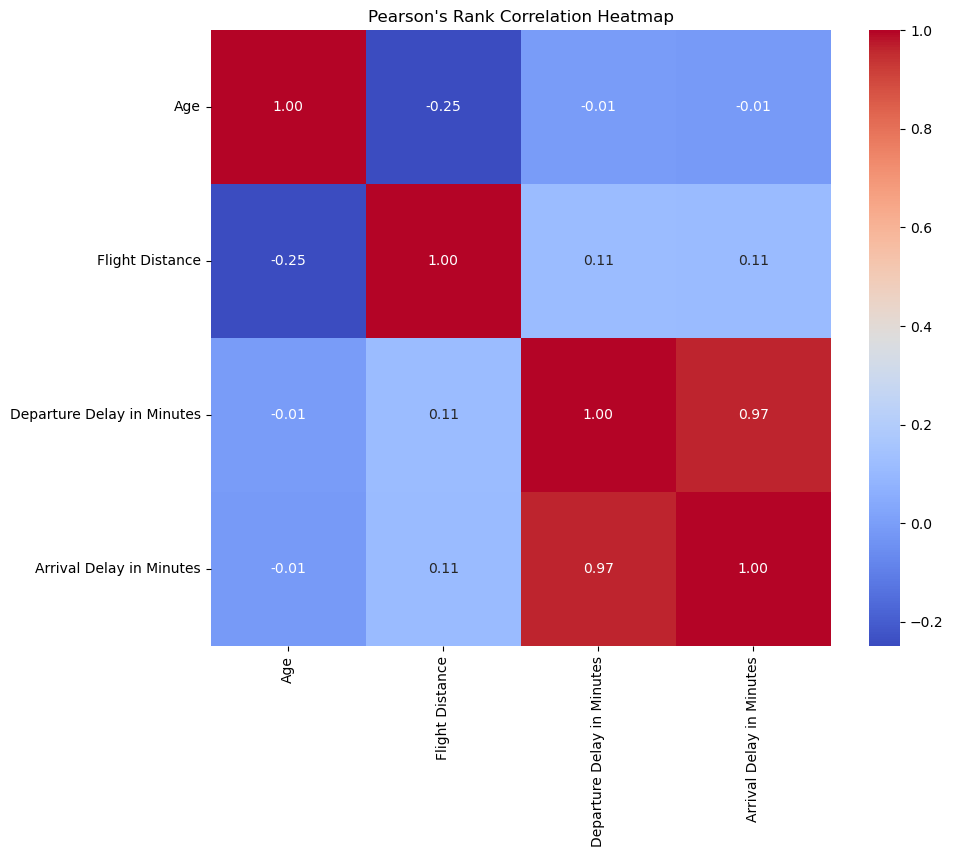

In [8]:
# =============================================================================
# 상관관계
# =============================================================================
import seaborn as sns
import matplotlib.pyplot as plt

# 피어슨 상관계수(연속형) 
airline_corr1 = airline.iloc[:, [3,6,21,22]]
correlation_matrix1 = airline_corr1.corr(method='pearson')

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson's Rank Correlation Heatmap")
plt.show()

# 'Departure Delay in Minutes', 'Arrival Delay in Minutes' 상관계수 0.97
# 결측치있는 'Arrival Delay in Minutes' drop

airline = airline.drop('Arrival Delay in Minutes', axis=1)

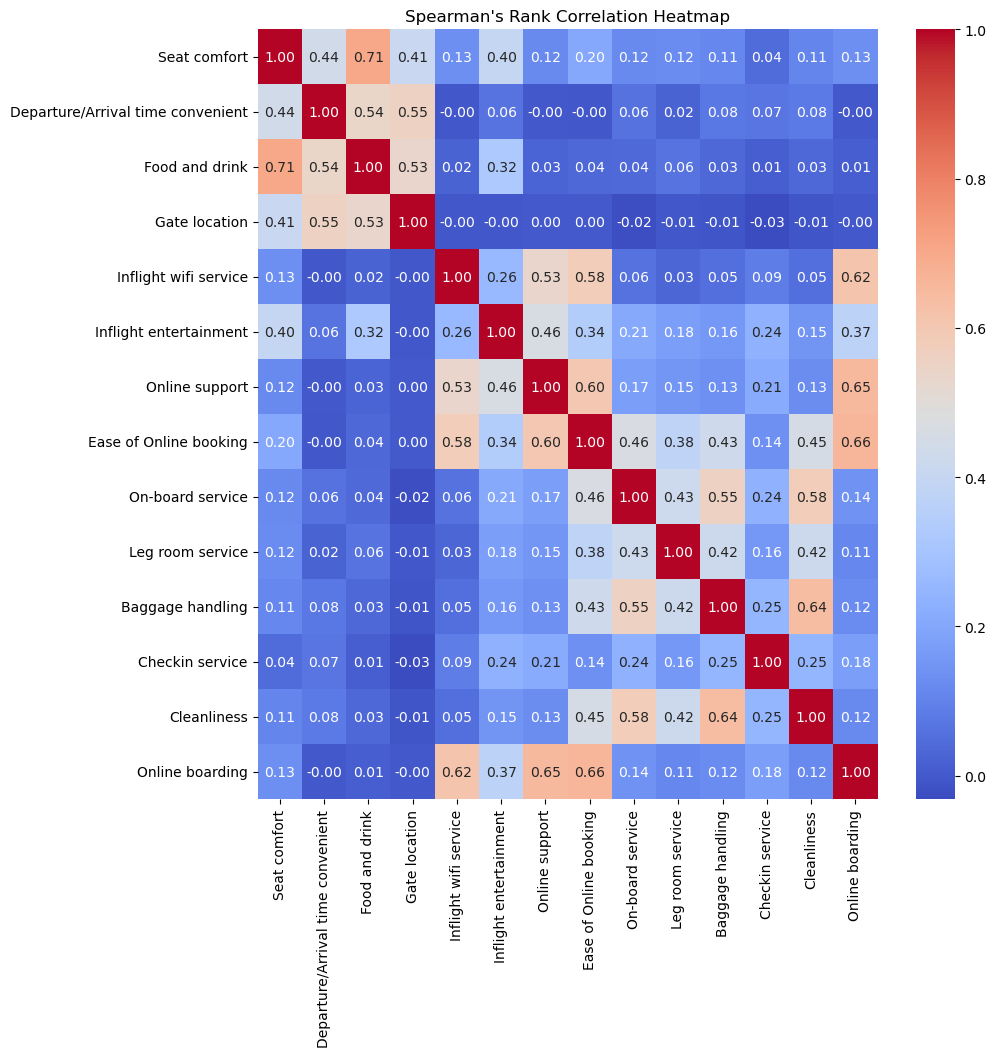

In [9]:
# 스피어만 상관계수 계산(순위 - 순위)
airline_corr2 = airline.iloc[:, [7,8,9,10,11,12,13,14,15,16,17,18,19,20]]
correlation_matrix2 = airline_corr2.corr(method='spearman')

# 히트맵 그리기
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman's Rank Correlation Heatmap")
plt.show()

Inflight entertainment와 satisfaction의 점이득 상관계수: 0.523496099894105
Ease of Online booking와 satisfaction의 점이득 상관계수: 0.4317723820838544
Online support와 satisfaction의 점이득 상관계수: 0.3901434030070615
On-board service와 satisfaction의 점이득 상관계수: 0.3520468476874402
Online boarding와 satisfaction의 점이득 상관계수: 0.33814687503211893
Leg room service와 satisfaction의 점이득 상관계수: 0.3049275151239216
Checkin service와 satisfaction의 점이득 상관계수: 0.266178740171116
Baggage handling와 satisfaction의 점이득 상관계수: 0.2603466819379019
Cleanliness와 satisfaction의 점이득 상관계수: 0.2593295591988325
Seat comfort와 satisfaction의 점이득 상관계수: 0.24238443197097728
Inflight wifi service와 satisfaction의 점이득 상관계수: 0.22706185454421723
Food and drink와 satisfaction의 점이득 상관계수: 0.12067666890803944
Departure/Arrival time convenient와 satisfaction의 점이득 상관계수: -0.01550654379694414
Gate location와 satisfaction의 점이득 상관계수: -0.01207083900185679


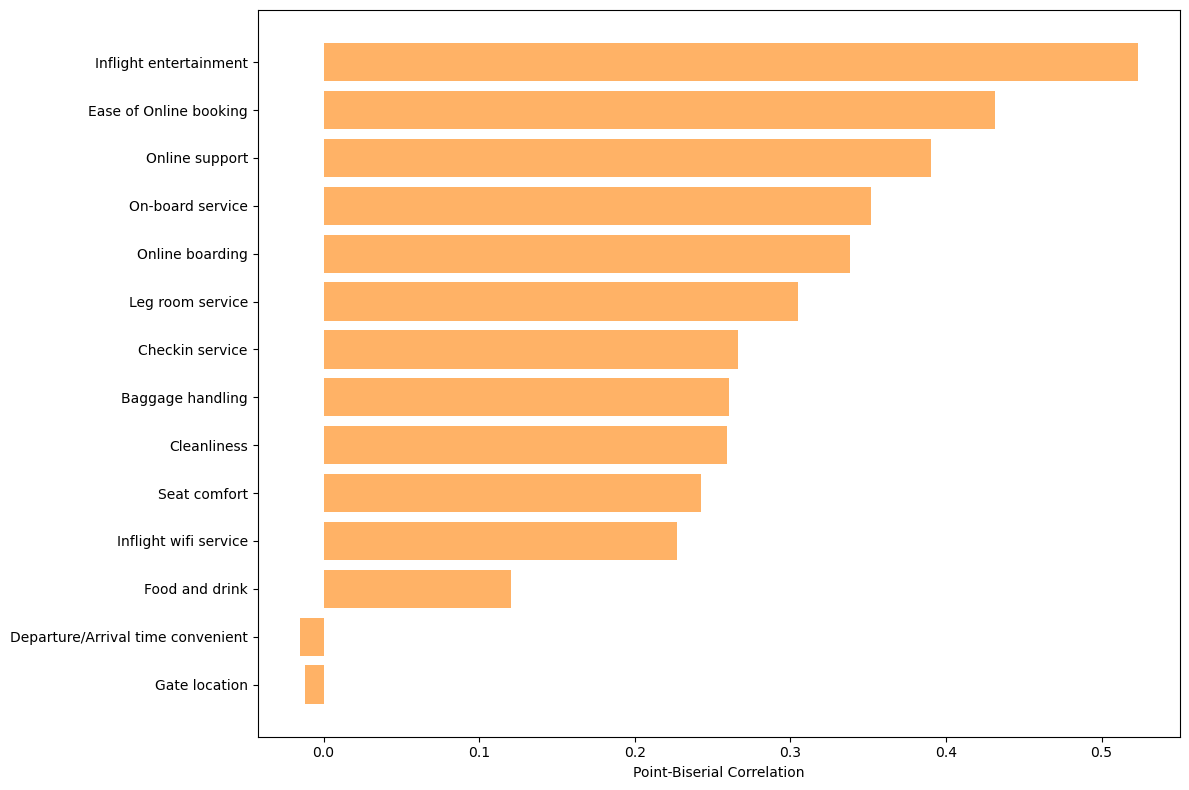

In [10]:
# 점이득 상관계수(순위 - 범주)
from scipy.stats import pointbiserialr
import matplotlib.pyplot as plt

# 순위형 변수 목록
ordinal_columns = [
    'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink',
    'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support',
    'Ease of Online booking', 'On-board service', 'Leg room service',
    'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding'
]

# 점이득 상관계수 계산 함수
def point_biserial_correlation(x, y):
    correlation, p_value = pointbiserialr(airline[x], airline[y])
    return correlation

# 각 순위형 변수와 satisfaction 간의 점이득 상관계수 계산
correlation_results = {}
for col in ordinal_columns:
    correlation = point_biserial_correlation(col, 'satisfaction')
    correlation_results[col] = correlation

# 점이득 상관계수 큰 순으로 정렬
sorted_correlation_results = dict(sorted(correlation_results.items(), key=lambda item: abs(item[1]), reverse=True))

# 결과 출력
for key, value in sorted_correlation_results.items():
    print(f'{key}와 satisfaction의 점이득 상관계수: {value}')

# 그래프 표현
labels = list(sorted_correlation_results.keys())
values = list(sorted_correlation_results.values())

plt.figure(figsize=(12, 8))
plt.barh(labels, values, color='#FFB266')
plt.xlabel('Point-Biserial Correlation')
plt.gca().invert_yaxis()  # 큰 값이 위로 오도록 y축 반전
plt.tight_layout()
plt.show()


In [11]:
# =============================================================================
# 모델링
# =============================================================================
# Random Forest
from sklearn.model_selection import train_test_split, cross_val_score as cv
from sklearn.ensemble import RandomForestClassifier as rf_c

airline_x = airline.drop(['satisfaction'], axis=1)
airline_y = airline['satisfaction'] 

train_x, test_x, train_y, test_y = train_test_split(airline_x, airline_y, random_state=0)

m_rf = rf_c(random_state=0)
m_rf.fit(train_x, train_y)
print("Train_score :", m_rf.score(train_x, train_y))    # 0.9999897341135408
print("Test_score :", m_rf.score(test_x, test_y))       # 0.9588543270711426

Train_score : 0.9999897341135408
Test_score : 0.9588543270711426


In [12]:
# XGB
from xgboost import XGBClassifier as xgb
m_xgb = xgb(random_state=0)
m_xgb.fit(train_x, train_y)
print("Train_score :", m_xgb.score(train_x, train_y))    # 0.9710604660712453
print("Test_score :", m_xgb.score(test_x, test_y))       # 0.9582383738835848

Train_score : 0.9710604660712453
Test_score : 0.9582383738835848


In [13]:
# lightgbm
from lightgbm import LGBMClassifier as lgb
m_lgb = lgb(random_state=0)
m_lgb.fit(train_x, train_y)
print("Train_score :", m_lgb.score(train_x, train_y))    # 0.9583923621804743
print("Test_score :", m_lgb.score(test_x, test_y))       # 0.9553741915614413

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 53237, number of negative: 44173
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007999 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 681
[LightGBM] [Info] Number of data points in the train set: 97410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.546525 -> initscore=0.186640
[LightGBM] [Info] Start training from score 0.186640
Train_score : 0.9583923621804743
Test_score : 0.9553741915614413


In [14]:
%%capture
# CatBoost
from catboost import CatBoostClassifier as cbc
m_cb = cbc(random_state=0)
m_cb.fit(train_x, train_y)

In [15]:
print("Train_score :", m_cb.score(train_x, train_y))    # 0.9720665229442562
print("Test_score :", m_cb.score(test_x, test_y))       # 0.9597166615337235

# 네가지 모델 전부 과적합 심하지는 않음

Train_score : 0.9720665229442562
Test_score : 0.9597166615337235


In [16]:
%%capture
# 점수 비교(정확도, 정밀도, 재현율, F1 score)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

classifiers = {
    'RandomForest': rf_c(random_state=0),
    'XGBoost': xgb(random_state=0),
    'LightGBM': lgb(random_state=0),
    'CatBoost': cbc(random_state=0)
}

# 분류기 학습 및 평가
results = {}
for name, clf in classifiers.items():
    clf.fit(train_x, train_y)
    y_pred = clf.predict(test_x)
    accuracy = accuracy_score(test_y, y_pred)
    precision = precision_score(test_y, y_pred, average='binary')
    recall = recall_score(test_y, y_pred, average='binary')
    f1 = f1_score(test_y, y_pred, average='binary')
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

In [17]:
# 결과 출력
results_df = pd.DataFrame(results).T
print(results_df)

#               Accuracy  Precision    Recall  F1 Score
# RandomForest  0.958854   0.970806  0.953838  0.962247
# XGBoost       0.958238   0.970022  0.953501  0.961691
# LightGBM      0.955374   0.966123  0.952213  0.959117
# CatBoost      0.959717   0.971067  0.955182  0.963059

# 근소한 차이지만 4가지 전부 높은 범주형에 특화된 Catboost로 최종모델 선정

              Accuracy  Precision    Recall  F1 Score
RandomForest  0.958854   0.970806  0.953838  0.962247
XGBoost       0.958238   0.970022  0.953501  0.961691
LightGBM      0.955374   0.966123  0.952213  0.959117
CatBoost      0.959717   0.971067  0.955182  0.963059


In [18]:
%%capture
# CatBoost 튜닝
from sklearn.model_selection import GridSearchCV

# CatBoost 분류기 객체 생성
m_cb = cbc()

# 튜닝할 하이퍼파라미터 범위 설정
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],   # 학습률
    'depth': [3, 5, 7],                    # 트리 깊이
    'l2_leaf_reg': [1, 3, 5],              # L2 규제
    'iterations': [100, 200, 300]          # 반복 횟수
}

# 그리드 탐색을 위한 GridSearchCV 객체 생성
grid_search = GridSearchCV(
    estimator=m_cb, 
    param_grid=param_grid, 
    cv=5,        # 교차 검증 폴드 수
    scoring='accuracy',  # 성능 측정 지표
    verbose=2,   # 상세한 정보 출력
    n_jobs=-1    # 모든 CPU 코어 사용
)

# 튜닝 시작
grid_search.fit(train_x, train_y)

In [23]:
# 최적의 하이퍼파라미터 출력
print("Best parameters found: ", grid_search.best_params_)    # Best parameters found:  {'depth': 7, 'iterations': 300, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
print("Best accuracy found: ", grid_search.best_score_)       # Best accuracy found:  0.9589364541628169

Best parameters found:  {'depth': 7, 'iterations': 300, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
Best accuracy found:  0.9588132635253054


In [24]:
%%capture
m_cb = cbc(depth = 7, iterations = 300, l2_leaf_reg = 1, learning_rate = 0.1)
m_cb.fit(train_x, train_y)

In [25]:
print("Train_score :", m_cb.score(train_x, train_y))    # 0.9687609075043631
print("Test_score :", m_cb.score(test_x, test_y))       # 0.9595010779180783

# 유의미한 튜닝은 힘듦

Train_score : 0.9687609075043631
Test_score : 0.9595010779180783


In [26]:
# =============================================================================
# 변수 중요도 추출
# =============================================================================
rf_importances = m_rf.feature_importances_
xgb_importance = m_xgb.feature_importances_
lgb_importance = m_lgb.feature_importances_
cb_importances = m_cb.feature_importances_

# 각 모델의 변수 중요도를 정규화
rf_importances_normalized = rf_importances / np.sum(rf_importances)
xgb_importance_normalized = xgb_importance / np.sum(xgb_importance)
lgb_importance_normalized = lgb_importance / np.sum(lgb_importance)
cb_importances_normalized = cb_importances / np.sum(cb_importances)

# 네 모델의 정규화된 변수 중요도의 평균을 계산
importances = (rf_importances_normalized + xgb_importance_normalized + lgb_importance_normalized + cb_importances_normalized) / 4

# 상위 25%의 변수를 선택
importance_threshold = np.percentile(importances, 75)
important_features = airline_x.columns[importances >= importance_threshold]

print("Important features:", important_features)

# Important features: Index(['Customer Type', 'Type of Travel', 'Seat comfort',
#        'Inflight entertainment', 'Online support', 'Ease of Online booking'],
#       dtype='object')

Important features: Index(['Customer Type', 'Type of Travel', 'Seat comfort',
       'Inflight entertainment', 'Online support', 'Ease of Online booking'],
      dtype='object')


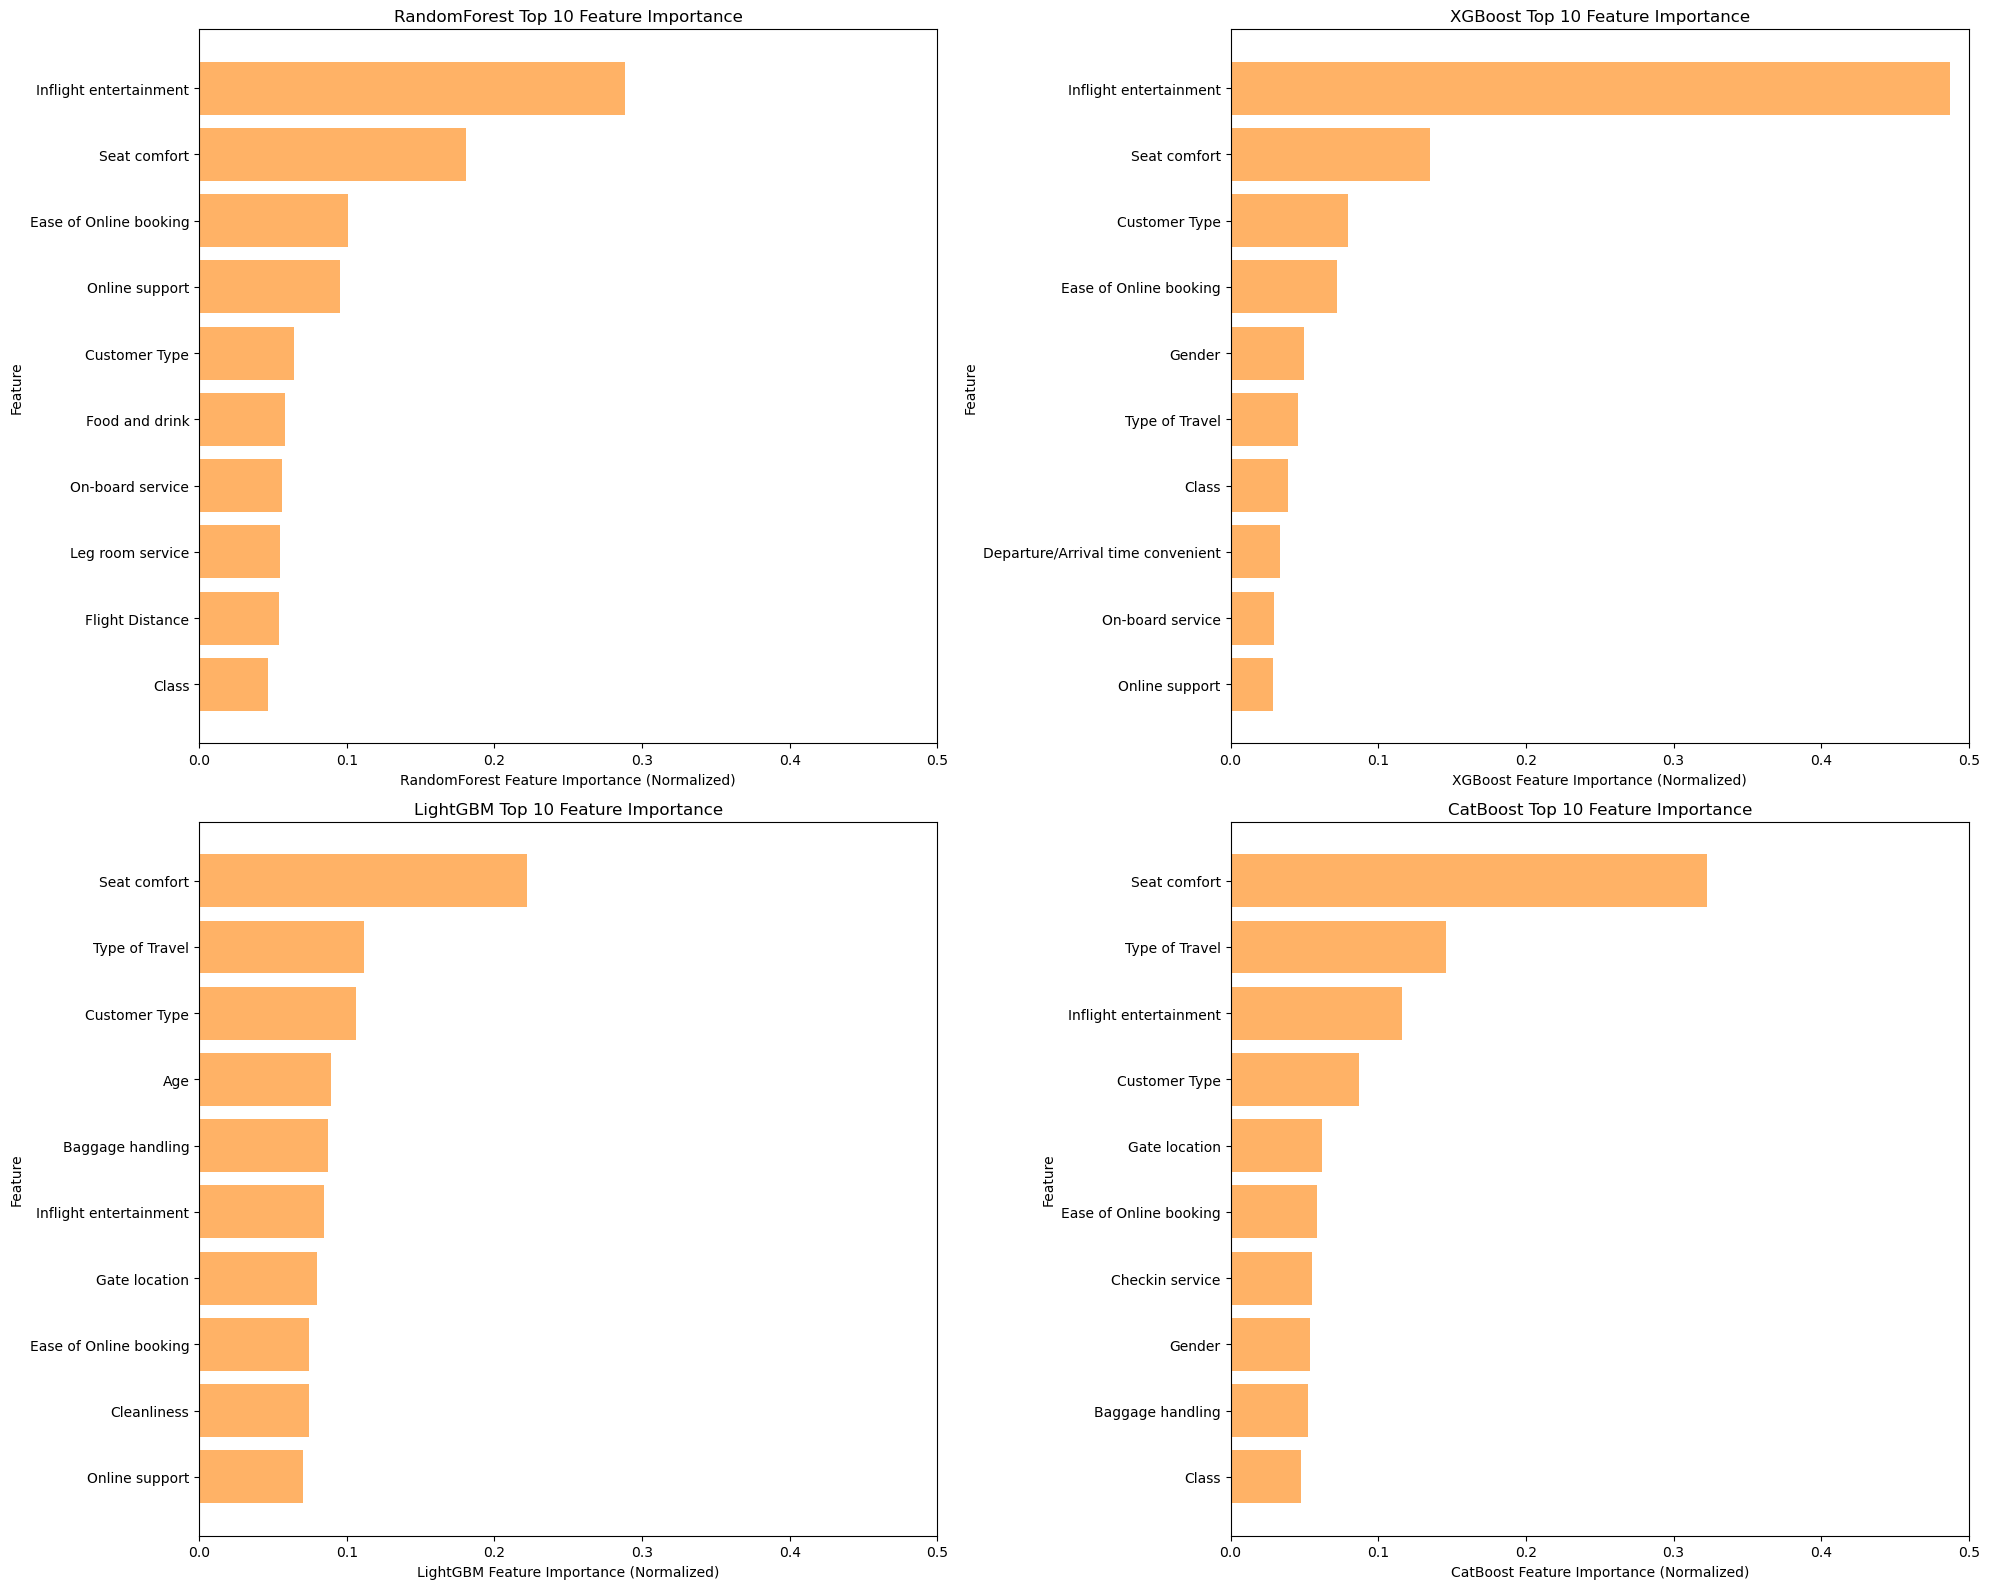

In [27]:
# =============================================================================
# 변수중요도 그래프
# =============================================================================
import matplotlib.pyplot as plt
# 상위 10개의 변수 중요도를 추출하고 시각화하는 함수
# Custom color: Orange, Emphasis2, 60% Lighter
custom_color = '#FFB266'

def plot_top_features(ax, importances, feature_names, model_name, top_n=10, color='#FFB266'):
    sorted_idx = np.argsort(importances)[-top_n:]  # 상위 top_n 개 선택
    normalized_importances = importances[sorted_idx] / np.sum(importances[sorted_idx])  # 정규화
    ax.barh(range(len(sorted_idx)), normalized_importances, align='center', color=color)
    ax.set_yticks(range(len(sorted_idx)))
    ax.set_yticklabels([feature_names[i] for i in sorted_idx])
    ax.set_xlabel(f'{model_name} Feature Importance (Normalized)')
    ax.set_ylabel('Feature')
    ax.set_title(f'{model_name} Top {top_n} Feature Importance')

# Figure 및 Axes 생성
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 각 분류기에 대한 변수 중요도 시각화
plot_top_features(axes[0, 0], rf_importances, airline_x.columns, 'RandomForest', top_n=10, color=custom_color)
plot_top_features(axes[0, 1], xgb_importance, airline_x.columns, 'XGBoost', top_n=10, color=custom_color)
plot_top_features(axes[1, 0], lgb_importance, airline_x.columns, 'LightGBM', top_n=10, color=custom_color)
plot_top_features(axes[1, 1], cb_importances, airline_x.columns, 'CatBoost', top_n=10, color=custom_color)

# xlim을 동일하게 설정
for ax in axes.flat:
    ax.set_xlim(0, 0.5)

# 레이아웃 조정
plt.tight_layout()
plt.show()


In [28]:
# =============================================================================
# 로지스틱 회귀
# =============================================================================

# 중요한 변수 중 고객타입이 아닌 서비스에 관련된 컬럼으로 데이터셋 구성
important_features = ['Seat comfort', 'Inflight entertainment', 'Online support', 'Ease of Online booking']
important_train_x = train_x[important_features]
important_test_x = test_x[important_features]

# 독립성 검정 (Durbin-Watson Test)
import statsmodels.api as sm
from statsmodels.api import add_constant

train_x_const = add_constant(important_train_x)
logit_model = sm.Logit(train_y, train_x_const).fit()
dw_statistic = sm.stats.durbin_watson(logit_model.resid_response)
print(f'Durbin-Watson statistic: {dw_statistic}')

# Durbin-Watson statistic: 2.0019015747826407이므로 자기 상관이 없다


# VIF 계산 (다중공선성 확인)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = DataFrame()
vif_data["Feature"] = important_features
vif_data["VIF"] = [variance_inflation_factor(important_train_x.values, i) for i in range(important_train_x.shape[1])]
print(vif_data)


#                   Feature        VIF
# 0            Seat comfort   5.981523
# 1  Inflight entertainment  10.453588
# 2          Online support  14.296127
# 3  Ease of Online booking  12.537854

# 다중공선성 문제로 변수 제거
important_features = ['Seat comfort', 'Inflight entertainment', 'Ease of Online booking']   
important_train_x = train_x[important_features]
important_test_x = test_x[important_features]

vif_data2 = DataFrame()
vif_data2["Feature"] = important_features
vif_data2["VIF"] = [variance_inflation_factor(important_train_x.values, i) for i in range(important_train_x.shape[1])]
print(vif_data2)


#                   Feature       VIF
# 0            Seat comfort  5.933960
# 1  Inflight entertainment  8.342904
# 2  Ease of Online booking  6.432025


Optimization terminated successfully.
         Current function value: 0.482318
         Iterations 6
Durbin-Watson statistic: 2.0019015747826407
                  Feature        VIF
0            Seat comfort   5.981523
1  Inflight entertainment  10.453588
2          Online support  14.296127
3  Ease of Online booking  12.537854
                  Feature       VIF
0            Seat comfort  5.933960
1  Inflight entertainment  8.342904
2  Ease of Online booking  6.432025


In [29]:
# 변수 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
important_train_x_scaled = scaler.fit_transform(important_train_x)
important_test_x_scaled = scaler.transform(important_test_x)

# 로지스틱 회귀 수행
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

m_lr = LogisticRegression(max_iter=10000)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear'는 l1 정규화를 지원하는 solver
}

# GridSearchCV 설정
grid_search = GridSearchCV(m_lr, param_grid, cv=5, scoring='accuracy')

# 학습 및 최적의 모델 선택
grid_search.fit(important_train_x_scaled, train_y)
best_model = grid_search.best_estimator_

# 최적 모델의 성능 평가
print("Best hyperparameters:", grid_search.best_params_)
print("Train_score with best model:", best_model.score(important_train_x_scaled, train_y))
print("Test_score with best model:", best_model.score(important_test_x_scaled, test_y))

# 교차 검증 점수
cv_score_lr = cross_val_score(best_model, important_train_x_scaled, train_y, cv=5)
print("CV_score_logistic_regression with best model:", cv_score_lr.mean())

Best hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Train_score with best model: 0.7930397289805975
Test_score with best model: 0.79125346473668
CV_score_logistic_regression with best model: 0.7930397289805974


In [30]:
# 회귀 계수 출력
coefficients = best_model.coef_[0]
for column, coef in zip(important_features, coefficients):
    print(f'{column}: {coef}')

print(f'Intercept: {best_model.intercept_}')

# 예측
y_pred_lr = best_model.predict(important_test_x_scaled)

# 성능 평가
accuracy = accuracy_score(test_y, y_pred_lr)
precision = precision_score(test_y, y_pred_lr)
recall = recall_score(test_y, y_pred_lr)
f1 = f1_score(test_y, y_pred_lr)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Seat comfort: 0.005743337369419775
Inflight entertainment: 1.2069913778805017
Ease of Online booking: 0.8180638439262162
Intercept: [0.19744668]
Accuracy: 0.79125346473668
Precision: 0.801820957365609
Recall: 0.823921568627451
F1 Score: 0.8127210433244916


In [31]:
# =============================================================================
# Pugh Matrix - Decision Matrix 활용 최적 개선안 선정 후 다시 로지스틱 회귀
# =============================================================================
important_features = ['Inflight entertainment', 'Ease of Online booking']   
important_train_x = train_x[important_features]
important_test_x = test_x[important_features]

# 변수 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
important_train_x_scaled = scaler.fit_transform(important_train_x)
important_test_x_scaled = scaler.transform(important_test_x)

# 로지스틱 회귀 수행
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

m_lr = LogisticRegression(max_iter=10000)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear'는 l1 정규화를 지원하는 solver
}

# GridSearchCV 설정
grid_search = GridSearchCV(m_lr, param_grid, cv=5, scoring='accuracy')

# 학습 및 최적의 모델 선택
grid_search.fit(important_train_x_scaled, train_y)
best_model = grid_search.best_estimator_

# 최적 모델의 성능 평가
print("Best hyperparameters:", grid_search.best_params_)
print("Train_score with best model:", best_model.score(important_train_x_scaled, train_y))
print("Test_score with best model:", best_model.score(important_test_x_scaled, test_y))

# 교차 검증 점수
cv_score_lr = cross_val_score(best_model, important_train_x_scaled, train_y, cv=5)
print("CV_score_logistic_regression with best model:", cv_score_lr.mean())

# 회귀 계수 출력
coefficients = best_model.coef_[0]
for column, coef in zip(important_features, coefficients):
    print(f'{column}: {coef}')

print(f'Intercept: {best_model.intercept_}')

# 예측
y_pred_lr = best_model.predict(important_test_x_scaled)

# 성능 평가
accuracy = accuracy_score(test_y, y_pred_lr)
precision = precision_score(test_y, y_pred_lr)
recall = recall_score(test_y, y_pred_lr)
f1 = f1_score(test_y, y_pred_lr)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Best hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Train_score with best model: 0.7930397289805975
Test_score with best model: 0.79125346473668
CV_score_logistic_regression with best model: 0.7930397289805974
Inflight entertainment: 1.2091975693382575
Ease of Online booking: 0.818489900217248
Intercept: [0.19783175]
Accuracy: 0.79125346473668
Precision: 0.801820957365609
Recall: 0.823921568627451
F1 Score: 0.8127210433244916


In [32]:
# =============================================================================
# 최종 변수가 3에서 4로 증가했을때
# =============================================================================
import numpy as np

# 회귀 계수 및 절편
intercept = 0.19780874
coefficients = {
    'Inflight entertainment': 1.209200579985587,
    'Ease of Online booking': 0.8184792665457761
}


# 확률 계산 함수
def calculate_probability(intercept, coefficients, values):
    log_odds = intercept
    for variable, value in values.items():
        log_odds += coefficients[variable] * value
    odds = np.exp(log_odds)
    probability = odds / (1 + odds)
    return probability

# 초기 변수 값 설정
base_values = {
    'Inflight entertainment': 3,
    'Ease of Online booking': 3
}

# 두 변수가 각각 3에서 4로 증가할 때의 확률 변화 계산
values_initial = base_values.copy()
values_changed = {
    'Inflight entertainment': 4,
    'Ease of Online booking': 4
}

prob_initial = calculate_probability(intercept, coefficients, values_initial)
prob_changed = calculate_probability(intercept, coefficients, values_changed)

print(f'Initial Probability (Inflight entertainment=3, Ease of Online booking=3): {prob_initial:.6f}')
print(f'Changed Probability (Inflight entertainment=4, Ease of Online booking=4): {prob_changed:.6f}')
print(f'Probability Change: {prob_changed - prob_initial:.6f}\n')

# Initial Probability (Inflight entertainment=3, Ease of Online booking=3): 0.998132
# Changed Probability (Inflight entertainment=4, Ease of Online booking=4): 0.999754
# Probability Change: 0.001622

Initial Probability (Inflight entertainment=3, Ease of Online booking=3): 0.998132
Changed Probability (Inflight entertainment=4, Ease of Online booking=4): 0.999754
Probability Change: 0.001622

